# Demonstration: Classificator from Latent Space

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading
from jax.example_libraries import optimizers

In [2]:
import sys
sys.path.insert(0, '../')

import vqe as vqe
import losses as losses
import autoencoder as aut

In [3]:
ae = aut.autoencoder(vqe.load_vqe('../data/vqe.pkl'), aut.autoencoder_circuit)

In [4]:
ae.show_circuit()

 0: ──RY(0.00)──||─╭IsingXX(0.00)────────────────────────────────────────────────────────────
 1: ──RY(0.00)──||─╰IsingXX(0.00)─╭IsingXX(0.00)─────────────────────────────────────────────
 2: ──RY(0.00)──||────────────────╰IsingXX(0.00)─╭IsingXX(0.00)──────────────────────────────
 3: ──RY(0.00)──||───────────────────────────────╰IsingXX(0.00)─╭IsingXX(0.00)───────────────
 4: ──RY(0.00)──||──────────────────────────────────────────────╰IsingXX(0.00)─╭IsingXX(0.00)
 5: ──RY(0.00)──||─────────────────────────────────────────────────────────────╰IsingXX(0.00)
 6: ──RY(0.00)──||───────────────────────────────────────────────────────────────────────────
 7: ──RY(0.00)──||───────────────────────────────────────────────────────────────────────────
 8: ────────────||───────────────────────────────────────────────────────────────────────────
 9: ────────────||───────────────────────────────────────────────────────────────────────────
10: ────────────||──────────────────────────────────────────

Cost: 0.09396195411682129 | Mean F. 0.9060370922088623: 100%|█| 300/300 [04:15<0


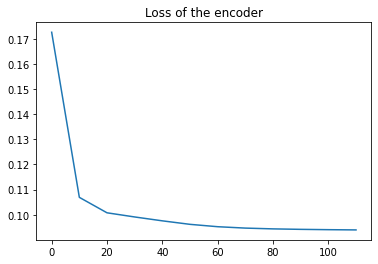

In [5]:
ae.train(.1, 300, np.arange(99), circuit=False, plot=True)

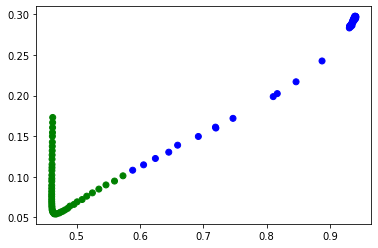

In [6]:
ae.show_latent_space()

Cost: 0.3157241642475128: 100%|███████████████| 300/300 [00:40<00:00,  7.44it/s]


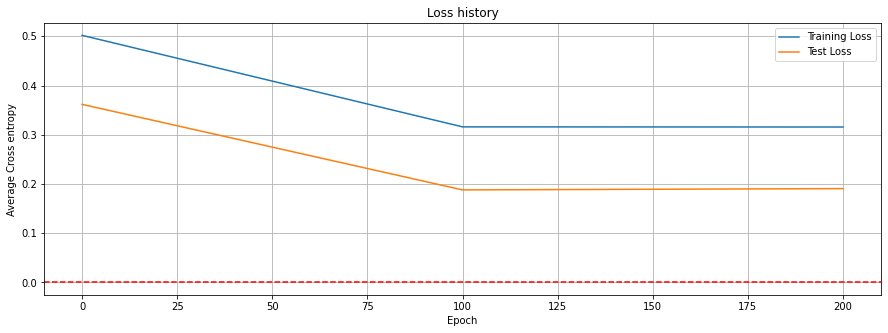

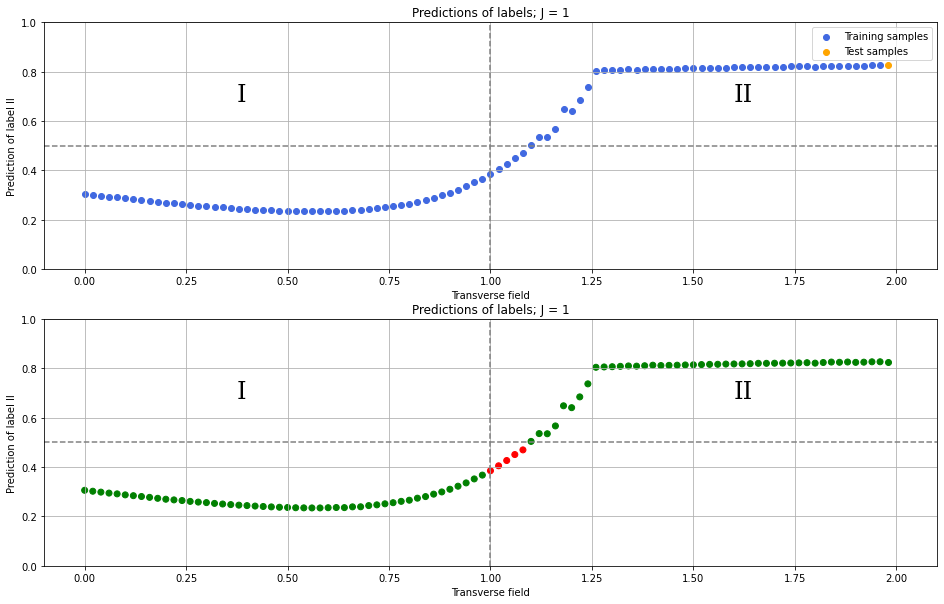

In [7]:
ae.latent_classify(1.5, 300, np.arange(99), losses.cross_entropy)